In [1]:
import os
import dotenv
import sqlalchemy
import pandas as pd
import numpy as np

In [2]:
igi = pd.read_csv("puliti/igieco_pulito.csv")

In [3]:
#rinomino le colonne di igi&co, melluso e nero giargini
igi = igi.rename(columns={
    "genere_categoria": "genere",
    "nome": "prodotto",
    "colore1" : "colore",
        
})

In [4]:
mel = pd.read_csv("puliti/melluso.csv")


In [5]:
mel = mel.rename(columns={
    "scontato": "prezzo_scontato",
    "prezzo" : "prezzo_originale",
    "nome": "prodotto",
    "mat1" : "materiale",
    "mat2" : "materiale2",
        
})

In [6]:
nero =pd.read_csv("puliti/nerogiardini.csv")

In [7]:
nero = nero.rename(columns={
    "scontato": "prezzo_scontato",
    "prezzo" : "prezzo_originale",
    "titolo": "prodotto",
    "colore_codice" : "codice_colore",
    
        
})

In [8]:
igi.columns

Index(['genere', 'nome_categoria', 'prodotto', 'prezzo_originale',
       'prezzo_scontato', 'immagine', 'link', 'colore', 'colore2', 'categoria',
       'sottocategoria'],
      dtype='object')

In [9]:
mel.columns

Index(['prodotto', 'link', 'prezzo_scontato', 'prezzo_originale', 'genere',
       'categoria', 'materiale', 'materiale2', 'colore1', 'colore2',
       'id_prodotto', 'differenza_prezzo'],
      dtype='object')

In [10]:
nero.columns

Index(['prodotto', 'codice_colore', 'categoria', 'genere', 'colore',
       'materiale', 'differenza_prezzo', 'prezzo_originale',
       'prezzo_scontato'],
      dtype='object')

In [11]:
#ORA FACCIO LA CONCATENAZIONE
#Prima di unirli, è importante etichettare ogni riga con il brand a cui appartiene:

igi["brand"] = "Igi&co"
mel["brand"] = "Melluso"
nero["brand"] = "Nero giardini"

In [12]:
df_unico = pd.concat([igi, mel, nero], ignore_index=True)

In [13]:
df_unico

,genere,nome_categoria,prodotto,prezzo_originale,prezzo_scontato,immagine,link,colore,colore2,categoria,sottocategoria,brand,materiale,materiale2,colore1,id_prodotto,differenza_prezzo,codice_colore
0,donna,sneakers,Sneakers con zeppa da donna beige e giallo con...,84.9,59.43,https://www.igieco.it/shop/media/catalog/produ...,https://www.igieco.it/shop/i_it/20251766182200...,beige,giallo,sneakers,zeppa,Igi&co,NaN,NaN,NaN,NaN,NaN,NaN
1,donna,sneakers,Sneakers con zeppa da donna verde e celeste co...,84.9,59.43,https://www.igieco.it/shop/media/catalog/produ...,https://www.igieco.it/shop/i_it/20251766181100...,verde,celeste,sneakers,zeppa,Igi&co,NaN,NaN,NaN,NaN,NaN,NaN
2,donna,sneakers,Sneakers da donna beige e verde con lacci,79.9,55.93,https://www.igieco.it/shop/media/catalog/produ...,https://www.igieco.it/shop/i_it/20251765962200...,beige,verde,sneakers,NaN,Igi&co,NaN,NaN,NaN,NaN,NaN,NaN
3,donna,sneakers,Sneakers con zeppa da donna beige con lacci,84.9,59.43,https://www.igieco.it/shop/media/catalog/produ...,https://www.igieco.it/shop/i_it/20251766184400...,beige,NaN,sneakers,zeppa,Igi&co,NaN,NaN,NaN,NaN,NaN,NaN
4,donna,sneakers,Sneakers eco-sostenibili da donna beige con lacci,79.9,55.93,https://www.igieco.it/shop/media/catalog/produ...,https://www.igieco.it/shop/i_it/20251766262200...,beige,NaN,sneakers,NaN,Igi&co,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,uomo,NaN,Stringate Uomo in Camoscio,139.5,97.50,NaN,NaN,blu,NaN,stringate,NaN,Nero giardini,camoscio,NaN,NaN,NaN,42.0,4.0
2694,uomo,NaN,Stringate Uomo in Vernice,149.5,104.50,NaN,NaN,nero,NaN,stringate,NaN,Nero giardini,vernice,NaN,NaN,NaN,45.0,5.0
2695,uomo,NaN,Stringate Uomo in Pelle,NaN,149.50,NaN,NaN,nero,NaN,stringate,NaN,Nero giardini,pelle,NaN,NaN,NaN,NaN,5.0
2696,uomo,NaN,Stringate Uomo in Pelle,149.5,104.50,NaN,NaN,nero,NaN,stringate,NaN,Nero giardini,pelle,NaN,NaN,NaN,45.0,5.0


In [14]:
#creo un csv del df unito
df_unico.to_csv("generale.csv", index=False, encoding="utf-8")

In [15]:
df_unico["categoria"] = df_unico["categoria"].str.lower()
df_unico["categoria"]

0        sneakers
1        sneakers
2        sneakers
3        sneakers
4        sneakers
          ...    
2693    stringate
2694    stringate
2695    stringate
2696    stringate
2697    stringate
Name: categoria, Length: 2698, dtype: object

In [17]:
import unicodedata

def remove_accents(text):
    return ''.join(
        c for c in unicodedata.normalize('NFD', text)
        if unicodedata.category(c) != 'Mn'
    )

# Applicare con .apply()
df_unico['categoria'] = df_unico['categoria'].apply(remove_accents)


TypeError: normalize() argument 2 must be str, not float

In [ ]:
df_unico.info()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = df_unico
# Supponendo che il tuo dataframe si chiami df
# Se non l'hai già caricato, caricalo come:
# df = pd.read_csv('tuo_file.csv')

# Pulizia: rimuovi i valori NaN nei campi di interesse
df_clean = df.dropna(subset=['brand', 'prezzo_originale', 'prezzo_scontato', 'nome_categoria'])

# Calcola la media dei prezzi per brand e categoria
grouped = df_clean.groupby(['brand', 'nome_categoria'])[['prezzo_originale', 'prezzo_scontato']].mean().reset_index()

# Per visualizzare meglio, puoi scegliere di filtrare alcune categorie o brand
# Ad esempio, limitare ai primi 10 brand
top_brands = grouped['brand'].value_counts().index[:10]
filtered = grouped[grouped['brand'].isin(top_brands)]

# Creazione del grafico
plt.figure(figsize=(12, 8))
sns.barplot(
    data=filtered,
    x='brand',
    y='prezzo_originale',
    hue='nome_categoria'
)

# Aggiungi etichette e titolo
plt.title('Comparazione Prezzi Originali e Scontati tra Brand e Categorie')
plt.xlabel('Brand')
plt.ylabel('Prezzo Medio (€)')
plt.legend(title='Categoria')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supponendo che il DataFrame si chiami df
# Se il DataFrame non è ancora caricato, caricalo prima

# Puliamo i dati rimuovendo le righe con valori nulli necessari
df_clean = df.dropna(subset=['brand', 'categoria', 'prezzo_originale'])

# Raggruppiamo per brand e categoria e calcoliamo il prezzo medio
grouped = df_clean.groupby(['brand', 'categoria'])['prezzo_originale'].mean().reset_index()

# Creiamo un grafico a barre per confrontare i brand per ogni categoria
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped, x='categoria', y='prezzo_originale', hue='brand')

# Personalizziamo il grafico
plt.title('Confronto dei prezzi originali medi tra brand per categoria')
plt.xlabel('Categoria')
plt.ylabel('Prezzo originale medio')
plt.xticks(rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostriamo il grafico
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponendo che il DataFrame si chiami df
# Se il tuo DataFrame ha un nome diverso, rinominalo di conseguenza

# Creiamo un DataFrame di esempio (rimuovi questa parte se usi già il tuo DataFrame)
# df = ... (il tuo DataFrame)

# Raggruppiamo per brand e categoria contando i prodotti
grouped = df.groupby(['brand', 'colore']).size().reset_index(name='numero_prodotti')

# Creiamo un pivot table per facilitare la visualizzazione
pivot_table = grouped.pivot(index='brand', columns='colore', values='numero_prodotti').fillna(0)

# Plotting
ax = pivot_table.plot(kind='bar', figsize=(12, 8))
plt.title('Numero di Prodotti per Brand e Colore')
plt.xlabel('Brand')
plt.ylabel('Numero di Prodotti')
plt.legend(title='colore')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponendo che il dataframe si chiami df
# Se non è già caricato, puoi caricarlo con pd.read_csv() o altri metodi

# Step 1: Raggruppa per categoria e brand, contando i prodotti
category_brand_counts = df.groupby(['categoria', 'brand']).size().reset_index(name='num_prodotti')

# Step 2: Per ogni categoria, ottieni le 4 categorie con più prodotti
top_categories = category_brand_counts.groupby('categoria')['num_prodotti'].sum().nlargest(4).index

# Step 3: Filtra i dati per le categorie top
filtered_counts = category_brand_counts[category_brand_counts['categoria'].isin(top_categories)]

# Step 4: Pivot per creare un grafico a barre
pivot_table = filtered_counts.pivot(index='categoria', columns='brand', values='num_prodotti').fillna(0)

# Step 5: Plot
ax = pivot_table.plot(kind='bar', figsize=(12, 8))
plt.title('Comparazione Prodotti per Brand nelle Top 4 Categorie')
plt.xlabel('Categoria')
plt.ylabel('Numero di Prodotti')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
df_unico["categoria"].unique()

array(['sneakers', 'slip on', 'ballerine', nan, 'sandali', 'mocassini',
       'zeppa', 'stivaletti', 'tacco', 'décolleté', 'gore-tex',
       'stringate', 'dècolletè', 'tacchi bassi', 'tacchi alti',
       'cerimonia', 'ciabatte', 'mocassini uomo', 'classiche',
       'ciabatte-e-sabot', 'decollete', 'slingback', 'sandali-eleganti',
       'tronchetti', 'stivali', 'derby'], dtype=object)

In [25]:
import pandas as pd

# Supponendo che il tuo DataFrame sia df_unico
df_unico["categoria"] = df_unico["categoria"].str.replace("ciabatte-e-sabot", "ciabatte", case=False, regex=False)

In [32]:
df_unico["categoria"] = df_unico["categoria"].str.replace('-', ' ')

In [33]:
df_unico["categoria"].unique()

array(['sneakers', 'slip on', 'ballerine', nan, 'sandali', 'mocassini',
       'zeppa', 'stivaletti', 'tacco', 'décolleté', 'gore tex',
       'stringate', 'tacchi bassi', 'tacchi alti', 'cerimonia',
       'ciabatte', 'classiche', 'slingback', 'sandali eleganti',
       'tronchetti', 'stivali', 'derby'], dtype=object)

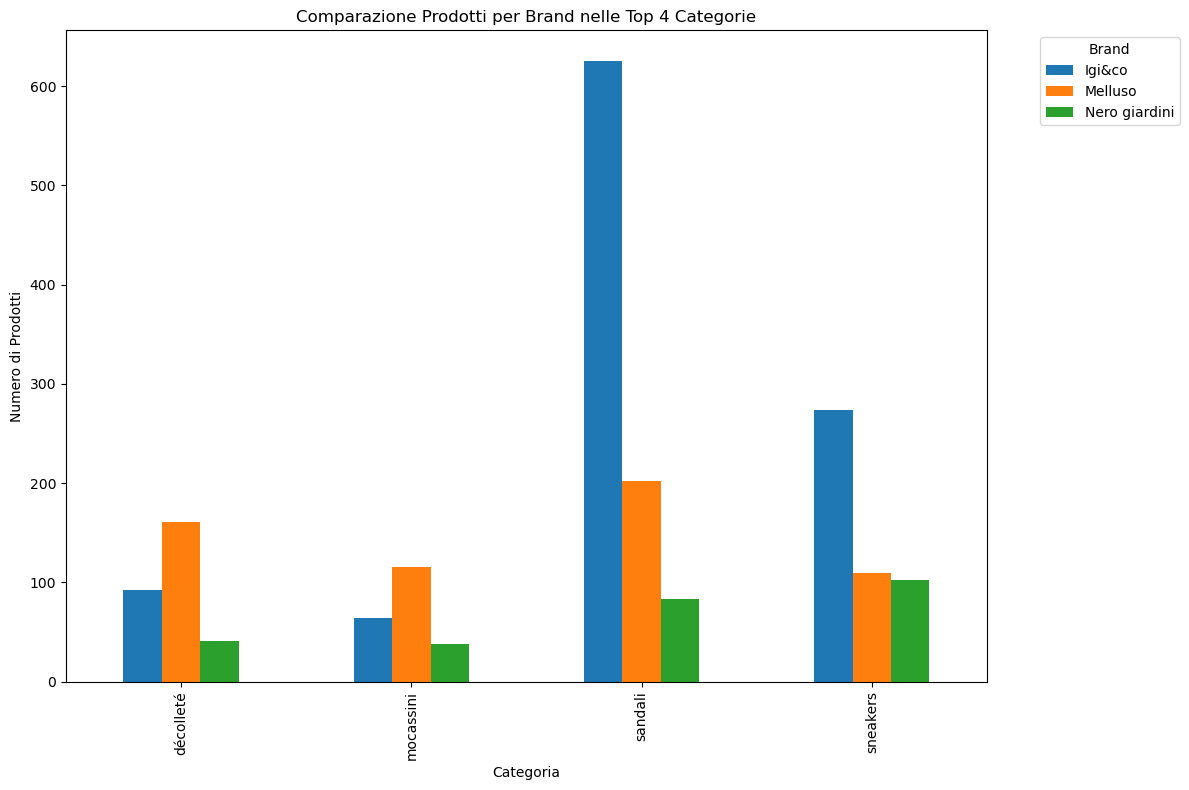

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
df = df_unico
# Supponendo che il dataframe si chiami df
# Se non è già caricato, puoi caricarlo con pd.read_csv() o altri metodi

# Step 1: Raggruppa per categoria e brand, contando i prodotti
category_brand_counts = df.groupby(['categoria', 'brand']).size().reset_index(name='num_prodotti')

# Step 2: Per ogni categoria, ottieni le 4 categorie con più prodotti
top_categories = category_brand_counts.groupby('categoria')['num_prodotti'].sum().nlargest(4).index

# Step 3: Filtra i dati per le categorie top
filtered_counts = category_brand_counts[category_brand_counts['categoria'].isin(top_categories)]

# Step 4: Pivot per creare un grafico a barre
pivot_table = filtered_counts.pivot(index='categoria', columns='brand', values='num_prodotti').fillna(0)

# Step 5: Plot
ax = pivot_table.plot(kind='bar', figsize=(12, 8))
plt.title('Comparazione Prodotti per Brand nelle Top 4 Categorie')
plt.xlabel('Categoria')
plt.ylabel('Numero di Prodotti')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title('Comparazione Prodotti per Brand nelle Top 4 Categorie')

# Salva il grafico come file PNG
plt.savefig('comparazione prodotti brand.png')

# Opzionale: mostra il grafico a schermo
plt.show()

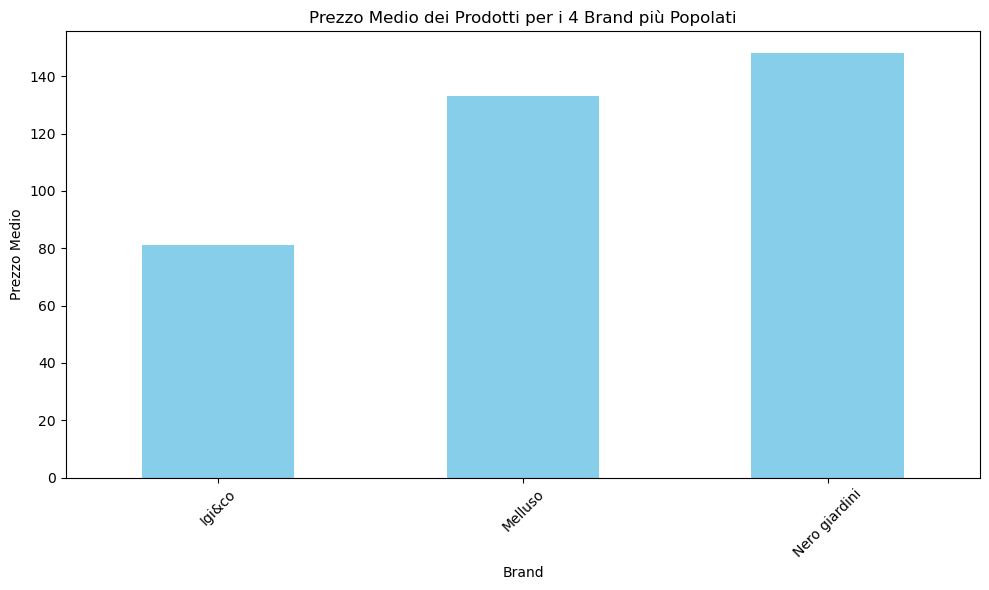

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponendo che il DataFrame si chiami df
# Se il DataFrame non è già caricato, caricalo come necessario

# 1. Calcolo del numero di prodotti per ogni brand
brand_counts = df['brand'].value_counts()

# 2. Seleziona i 4 brand più popolati
top_4_brands = brand_counts.nlargest(4).index

# 3. Filtra il DataFrame per includere solo questi brand
df_top_brands = df[df['brand'].isin(top_4_brands)]

# 4. Calcola il prezzo medio per ogni brand
# Puoi scegliere tra 'prezzo_originale' o 'prezzo_scontato'
# Qui userò 'prezzo_originale' e ignoro i valori nulli
prezzi_medi = df_top_brands.groupby('brand')['prezzo_originale'].mean()

# 5. Creazione del grafico a barre
plt.figure(figsize=(10,6))
prezzi_medi.plot(kind='bar', color='skyblue')
plt.title('Prezzo Medio dei Prodotti per i 4 Brand più Popolati')
plt.xlabel('Brand')
plt.ylabel('Prezzo Medio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


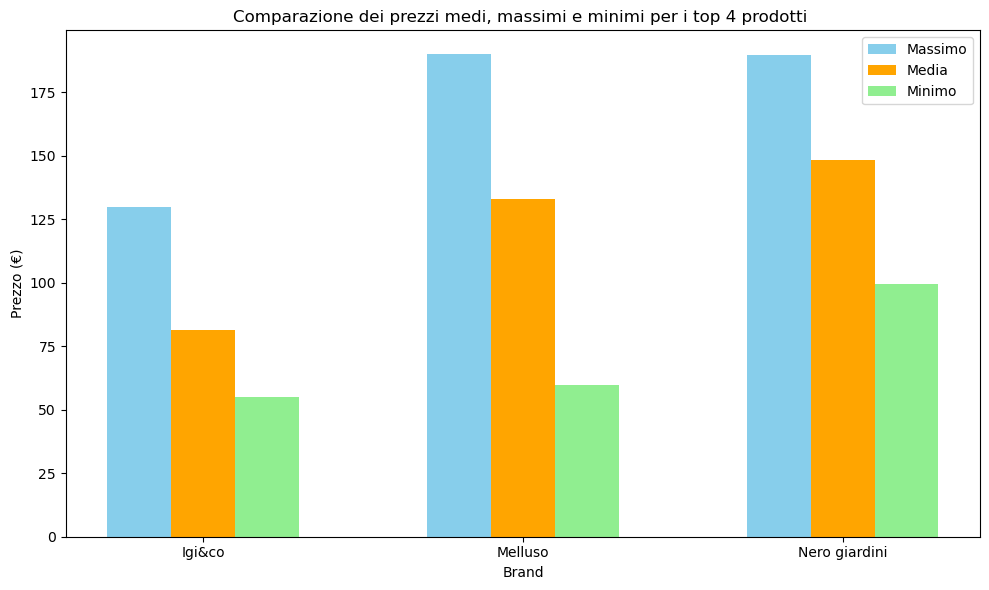

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponendo che il tuo DataFrame si chiami df
# Se necessario, puoi leggere i dati da un file, ad esempio:
# df = pd.read_csv('tuo_file.csv')

# 1. Rimuovere i record con prezzi nulli
df_clean = df.dropna(subset=['prezzo_originale', 'brand'])

# 2. Selezionare le 4 categorie di brand più popolose
top_brands = df_clean['brand'].value_counts().nlargest(4).index

# 3. Filtrare il DataFrame per includere solo questi brand
df_top_brands = df_clean[df_clean['brand'].isin(top_brands)]

# 4. Calcolare le statistiche: media, max, min dei prezzi per ogni brand
stats = df_top_brands.groupby('brand')['prezzo_originale'].agg(['mean', 'max', 'min']).reset_index()

# 5. Creare il grafico
fig, ax = plt.subplots(figsize=(10, 6))
x = stats['brand']
bar_width = 0.2
x_indices = range(len(x))

# Bar per media
ax.bar(x_indices, stats['max'], width=bar_width, label='Massimo', color='skyblue', align='center')

# Bar per massimo
ax.bar([i + bar_width for i in x_indices], stats['mean'], width=bar_width, label='Media', color='orange', align='center')

# Bar per minimo
ax.bar([i + 2 * bar_width for i in x_indices], stats['min'], width=bar_width, label='Minimo', color='lightgreen', align='center')

# Impostare le etichette
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)
ax.set_xlabel('Brand')
ax.set_ylabel('Prezzo (€)')
ax.set_title('Comparazione dei prezzi medi, massimi e minimi per i top 4 prodotti ')
ax.legend()

plt.tight_layout()
plt.show()


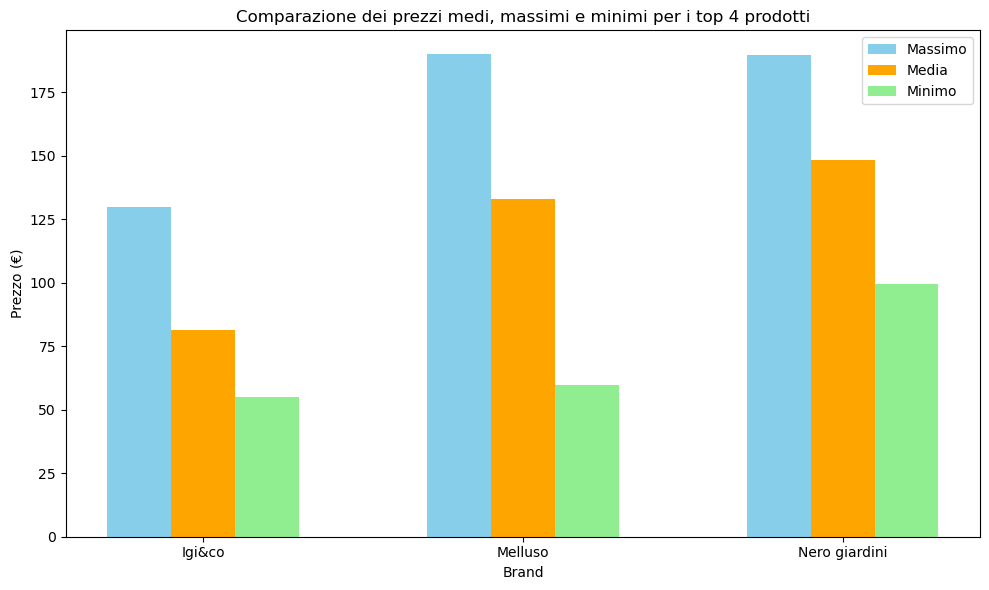

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponendo che il tuo DataFrame si chiami df
# Se necessario, puoi leggere i dati da un file, ad esempio:
# df = pd.read_csv('tuo_file.csv')

# 1. Rimuovere i record con prezzi nulli
df_clean = df.dropna(subset=['prezzo_originale', 'brand'])

# 2. Selezionare le 4 categorie di brand più popolose
top_brands = df_clean['brand'].value_counts().nlargest(4).index

# 3. Filtrare il DataFrame per includere solo questi brand
df_top_brands = df_clean[df_clean['brand'].isin(top_brands)]

# 4. Calcolare le statistiche: media, max, min dei prezzi per ogni brand
stats = df_top_brands.groupby('brand')['prezzo_originale'].agg(['mean', 'max', 'min']).reset_index()

# 5. Creare il grafico
fig, ax = plt.subplots(figsize=(10, 6))
x = stats['brand']
bar_width = 0.2
x_indices = range(len(x))

# Bar per media
ax.bar(x_indices, stats['max'], width=bar_width, label='Massimo', color='skyblue', align='center')

# Bar per massimo
ax.bar([i + bar_width for i in x_indices], stats['mean'], width=bar_width, label='Media', color='orange', align='center')

# Bar per minimo
ax.bar([i + 2 * bar_width for i in x_indices], stats['min'], width=bar_width, label='Minimo', color='lightgreen', align='center')

# Impostare le etichette
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)
ax.set_xlabel('Brand')
ax.set_ylabel('Prezzo (€)')
ax.set_title('Comparazione dei prezzi medi, massimi e minimi per i top 4 prodotti ')
ax.legend()

plt.tight_layout()
plt.title('Comparazione dei prezzi medi, massimi e minimi per i top 4 prodotti')

# Salva il grafico come file PNG
plt.savefig('grafico comprazione prezzi.png')

# Opzionale: mostra il grafico a schermo
plt.show()
